In [1]:
import re

import numpy as np
import pandas as pd

import folium
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('../../../input/2016 School Explorer.csv')
df2 = pd.read_csv('../../../input/D5 SHSAT Registrations and Testers.csv')

In [3]:
df1_copy = df1.copy()
df2_copy = df2.copy()

In [4]:
for col in df1_copy.columns.values:
    print col

Adjusted Grade
New?
Other Location Code in LCGMS
School Name
SED Code
Location Code
District
Latitude
Longitude
Address (Full)
City
Zip
Grades
Grade Low
Grade High
Community School?
Economic Need Index
School Income Estimate
Percent ELL
Percent Asian
Percent Black
Percent Hispanic
Percent Black / Hispanic
Percent White
Student Attendance Rate
Percent of Students Chronically Absent
Rigorous Instruction %
Rigorous Instruction Rating
Collaborative Teachers %
Collaborative Teachers Rating
Supportive Environment %
Supportive Environment Rating
Effective School Leadership %
Effective School Leadership Rating
Strong Family-Community Ties %
Strong Family-Community Ties Rating
Trust %
Trust Rating
Student Achievement Rating
Average ELA Proficiency
Average Math Proficiency
Grade 3 ELA - All Students Tested
Grade 3 ELA 4s - All Students
Grade 3 ELA 4s - American Indian or Alaska Native
Grade 3 ELA 4s - Black or African American
Grade 3 ELA 4s - Hispanic or Latino
Grade 3 ELA 4s - Asian or Pacific

In [5]:
for col in df2_copy.columns.values:
    print col

DBN
School name
Year of SHST
Grade level
Enrollment on 10/31
Number of students who registered for the SHSAT
Number of students who took the SHSAT


In [6]:
remove = ['Other Location Code in LCGMS', 'Adjusted Grade', 'New?']
df1_copy = df1_copy.drop(columns=remove)

In [7]:
df1_copy['IsCommunitySchool'] = df1_copy['Community School?'] == 'Yes'
df1_copy = df1_copy.drop(columns=['Community School?'])

In [8]:
percent_pattern = r'Percent\s.*'
percent_regex = re.compile(percent_pattern, re.IGNORECASE)

for col in df1_copy.columns.values:
    if percent_regex.search(col):
        print col
        df1_copy[col] = df1_copy[col].astype(np.object).str.replace('%', '').astype(float)
df1_copy['Student Attendance Rate'] = df1_copy['Student Attendance Rate'].astype(np.object).str.replace('%', '').astype(float)
df1_copy['Percent of Students Chronically Absent'] = df1_copy['Percent of Students Chronically Absent'].astype(np.object).str.replace('%', '').astype(float)

Percent ELL
Percent Asian
Percent Black
Percent Hispanic
Percent Black / Hispanic
Percent White
Percent of Students Chronically Absent


In [9]:
df1_copy['School Name'] = df1_copy['School Name'].astype(str)
df1_copy = df1_copy[df1_copy['Grade High'] != '0K']
df1_copy['Grade High'] = df1_copy['Grade High'].astype(float)

In [10]:
df1_copy = df1_copy[df1_copy['Grade High'] > 5]

In [11]:
school_map = folium.Map([df1_copy['Latitude'].mean(), df1_copy['Longitude'].mean()], 
                        zoom_start=11,
                        tiles='Stamen Terrain') 
for index in range(len(df1_copy)):
    row = df1_copy.iloc[index]
    
#     school_name = "".join([i for i in row['School Name'] if ord(i) < 128]).replace("'", "")
    school_name = str(row['School Income Estimate'])
    
    color = 'blue'
    if row['Student Attendance Rate'] < 50:
        color = 'red'
    
#     print school_name
    folium.Marker([row['Latitude'], row['Longitude']], popup=school_name, icon=folium.Icon(color=color)).add_to(school_map)
school_map

In [12]:
df2_copy['Took Percentage'] = df2_copy['Number of students who took the SHSAT'] / df2_copy['Number of students who registered for the SHSAT']

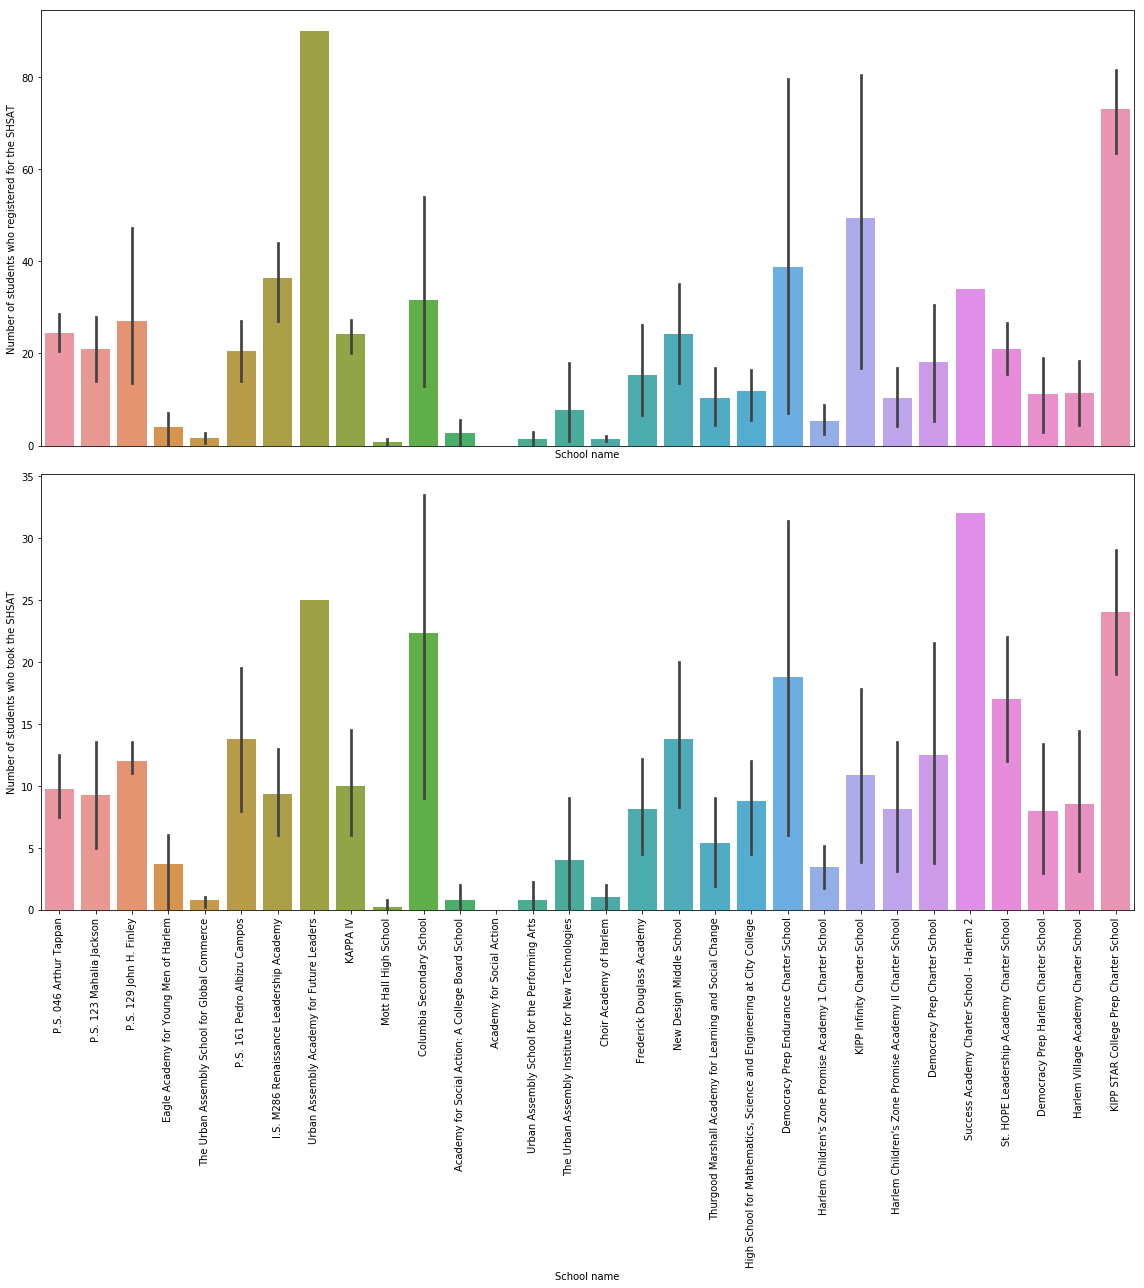

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 18))
sns.barplot(x='School name', y='Number of students who registered for the SHSAT', data=df2_copy, ax=ax[0])
sns.barplot(x='School name', y='Number of students who took the SHSAT', data=df2_copy, ax=ax[1])

for ax in fig.axes[:-1]:
    plt.sca(ax)
    plt.xticks([])
plt.sca(fig.axes[-1])
plt.xticks(rotation=90)

fig.tight_layout()

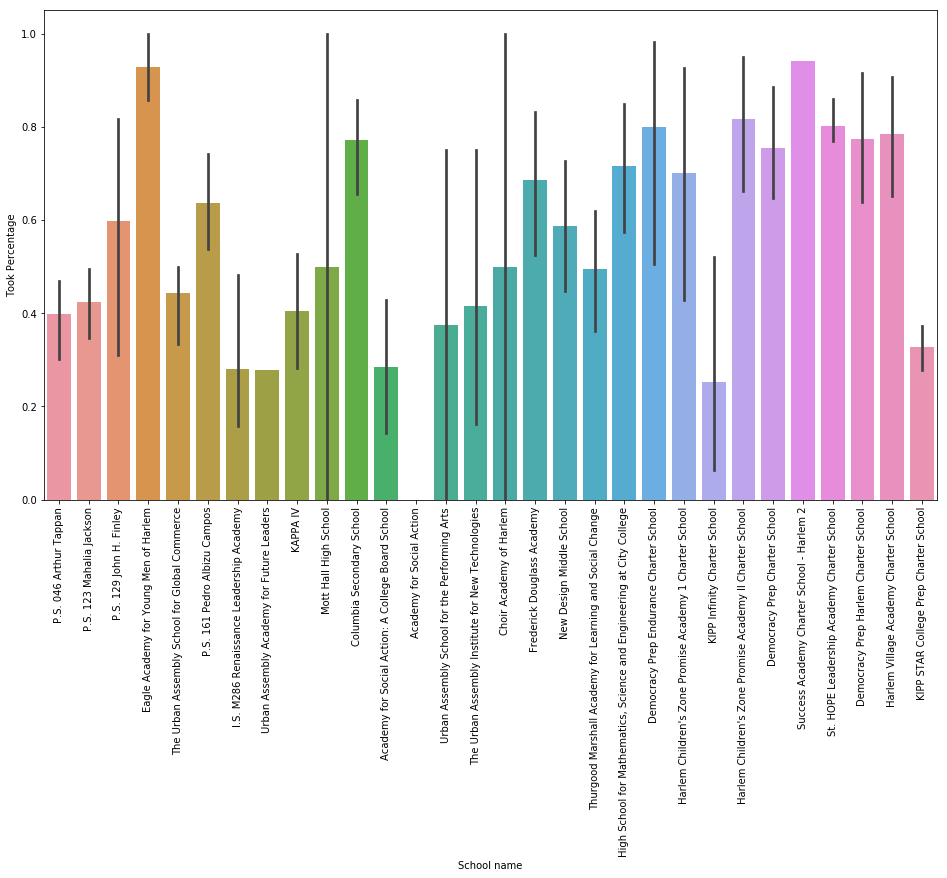

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
sns.barplot(x='School name', y='Took Percentage', data=df2_copy, ax=ax)
plt.xticks(rotation=90)